In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
#load the csv file
datas = pd.read_csv('./data/NYC_AB.csv',encoding='utf-8')# AIRBNB new york database

In [4]:
datas.head(5)#see whats inside

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

** if you consider important any categorical feature this is a simple way to convert it to a numeric alone so you can use it to increase the accuracy of your model.**

In [165]:
replacing = list(datas['neighbourhood_group'].unique())#make a lis of unique values in a column

#then assing one unique number per value
how_many = datas['neighbourhood_group'].unique()
how_many = how_many.shape[0]
new_value = list(np.arange(how_many))

#and the last thing is exachange the old colum for the one you just created
datas['neighbourhood_group'] = datas['neighbourhood_group'].replace(to_replace= replacing, value= new_value)
datas.head(5)

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name  neighbourhood_group neighbourhood  latitude  longitude  \
0         John                    0    Kensington  40.64749  -73.97237   
1     Jennifer                    1       Midtown  40.75362  -73.98377   
2    Elisabeth                    1        Harlem  40.80902  -73.94190   
3  LisaRoxanne                    0  Clinton Hill  40.68514  -73.95976   
4        Laura                    1   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [166]:
#do the same if like other column
replacing = list(datas['neighbourhood'].unique())

how_many = datas['neighbourhood'].unique()
how_many = how_many.shape[0]
new_value = list(np.arange(how_many)+5)

datas['neighbourhood'] = datas['neighbourhood'].replace(to_replace= replacing, value= new_value)
datas.head(5)

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name  neighbourhood_group  neighbourhood  latitude  longitude  \
0         John                    0              5  40.64749  -73.97237   
1     Jennifer                    1              6  40.75362  -73.98377   
2    Elisabeth                    1              7  40.80902  -73.94190   
3  LisaRoxanne                    0              8  40.68514  -73.95976   
4        Laura                    1              9  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [167]:
datas.shape#cheak size

(48895, 16)

In [168]:
for i in datas.columns:#print columns
    print(i)

id
name
host_id
host_name
neighbourhood_group
neighbourhood
latitude
longitude
room_type
price
minimum_nights
number_of_reviews
last_review
reviews_per_month
calculated_host_listings_count
availability_365


In [169]:
datas.info()#see data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null int64
neighbourhood                     48895 non-null int64
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64
d

In [170]:
datas.loc[750,:]#see only one house

id                                                             270681
name                              BEDFORD AV.  ROOM IN WILLIAMSBURG..
host_id                                                       1315849
host_name                                              Javier Pedraza
neighbourhood_group                                                 0
neighbourhood                                                      17
latitude                                                      40.7103
longitude                                                    -73.9613
room_type                                                Private room
price                                                              75
minimum_nights                                                      2
number_of_reviews                                                   5
last_review                                                2015-09-07
reviews_per_month                                                0.06
calculated_host_list

## now we need to eliminate string data type columns

In [171]:
numC = (datas.dtypes == int) | (datas.dtypes == float)#filter of numer columns
numC 

id                                 True
name                              False
host_id                            True
host_name                         False
neighbourhood_group                True
neighbourhood                      True
latitude                           True
longitude                          True
room_type                         False
price                              True
minimum_nights                     True
number_of_reviews                  True
last_review                       False
reviews_per_month                  True
calculated_host_listings_count     True
availability_365                   True
dtype: bool

In [172]:
num_datas = [c for c in numC.index if numC[c]]#creating a list of columns that only contain numbers

In [173]:
num_datas

['id',
 'host_id',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [174]:
num_datas = datas[num_datas]#creatin a dataframe that only containt columns numbers

In [175]:
num_datas.head(5)

id  host_id  neighbourhood_group  neighbourhood  latitude  longitude  \
0  2539     2787                    0              5  40.64749  -73.97237   
1  2595     2845                    1              6  40.75362  -73.98377   
2  3647     4632                    1              7  40.80902  -73.94190   
3  3831     4869                    0              8  40.68514  -73.95976   
4  5022     7192                    1              9  40.79851  -73.94399   

   price  minimum_nights  number_of_reviews  reviews_per_month  \
0    149               1                  9               0.21   
1    225               1                 45               0.38   
2    150               3                  0                NaN   
3     89               1                270               4.64   
4     80              10                  9               0.10   

   calculated_host_listings_count  availability_365  
0                               6               365  
1                               2               355  
2                               1               365  
3                               1               194  
4                               1                 0

In [176]:
num_datas.shape

(48895, 12)

** visualize the data looking for inconsistencies **

Text(0, 0.5, 'reviews')

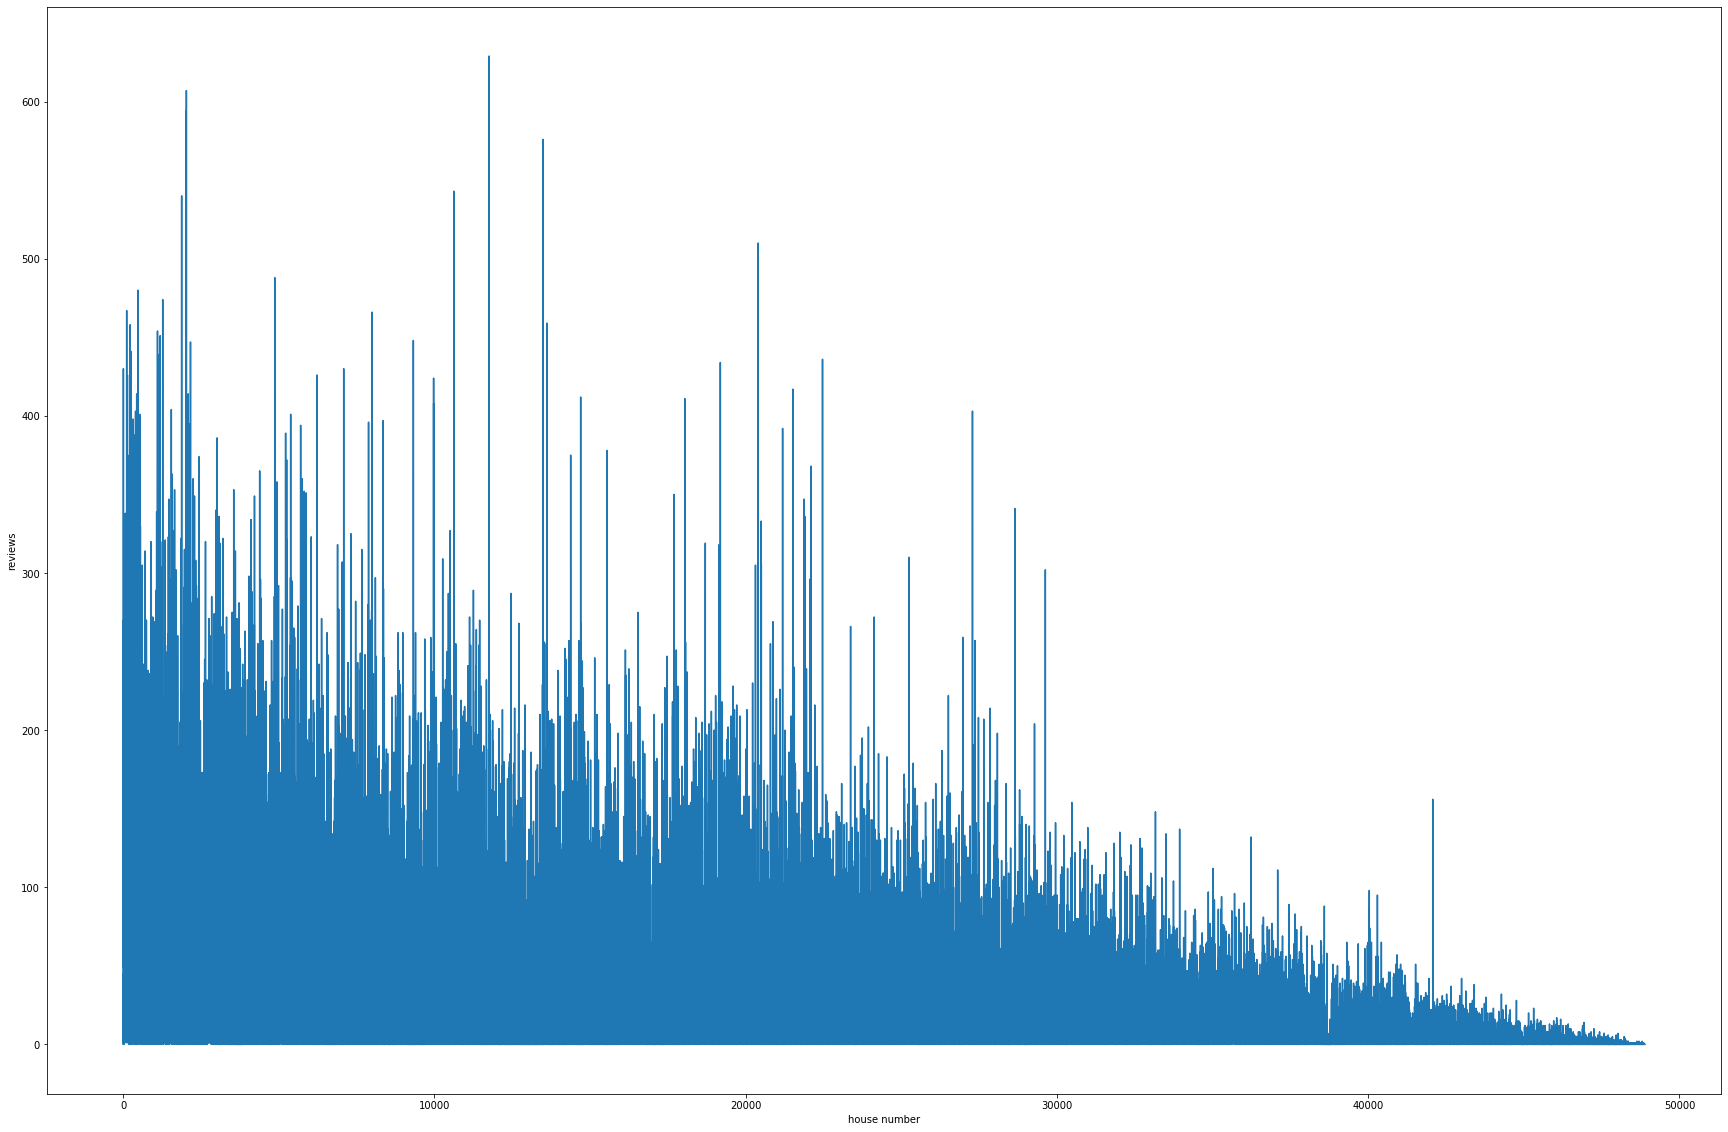

In [177]:
plt.plot(num_datas['number_of_reviews'])
plt.xlabel('house number')

plt.ylabel('reviews')

Text(0, 0.5, 'price')

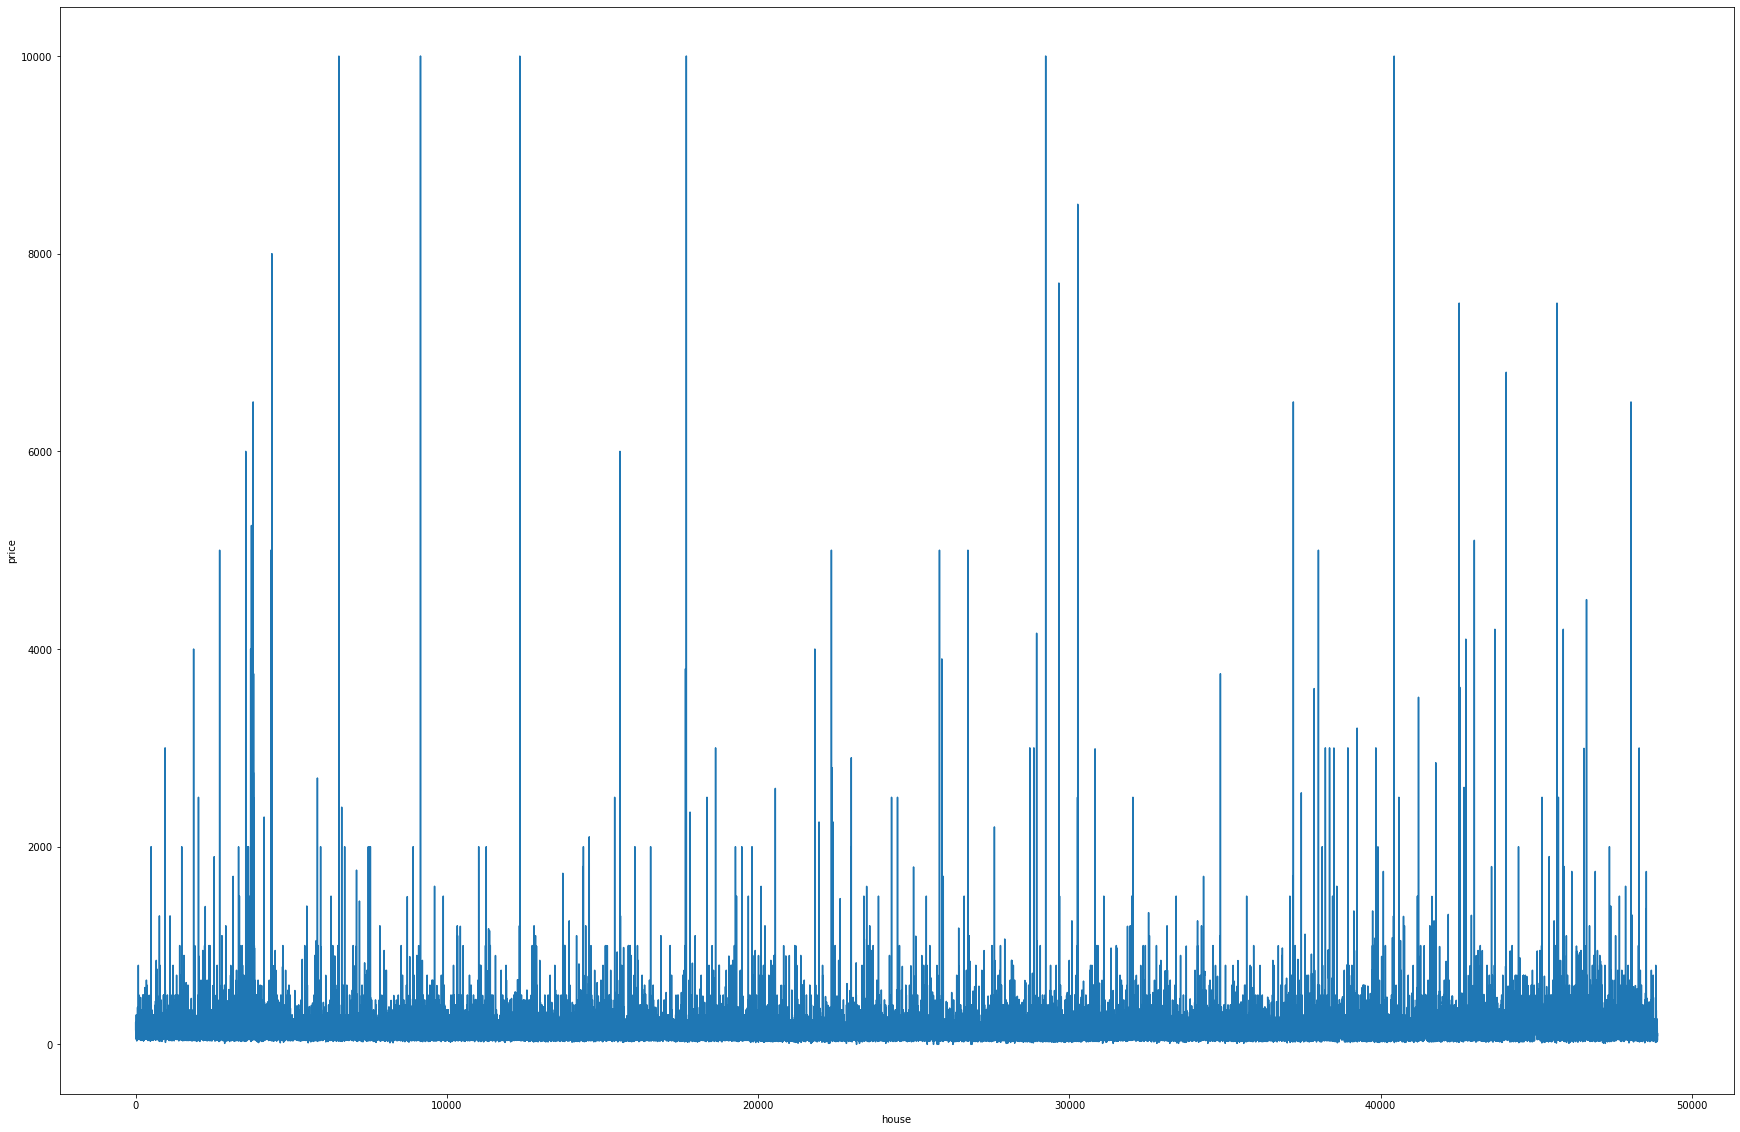

In [178]:
plt.plot(num_datas['price'])
plt.xlabel('house')

plt.ylabel('price')

Text(0, 0.5, 'minimunm nights')

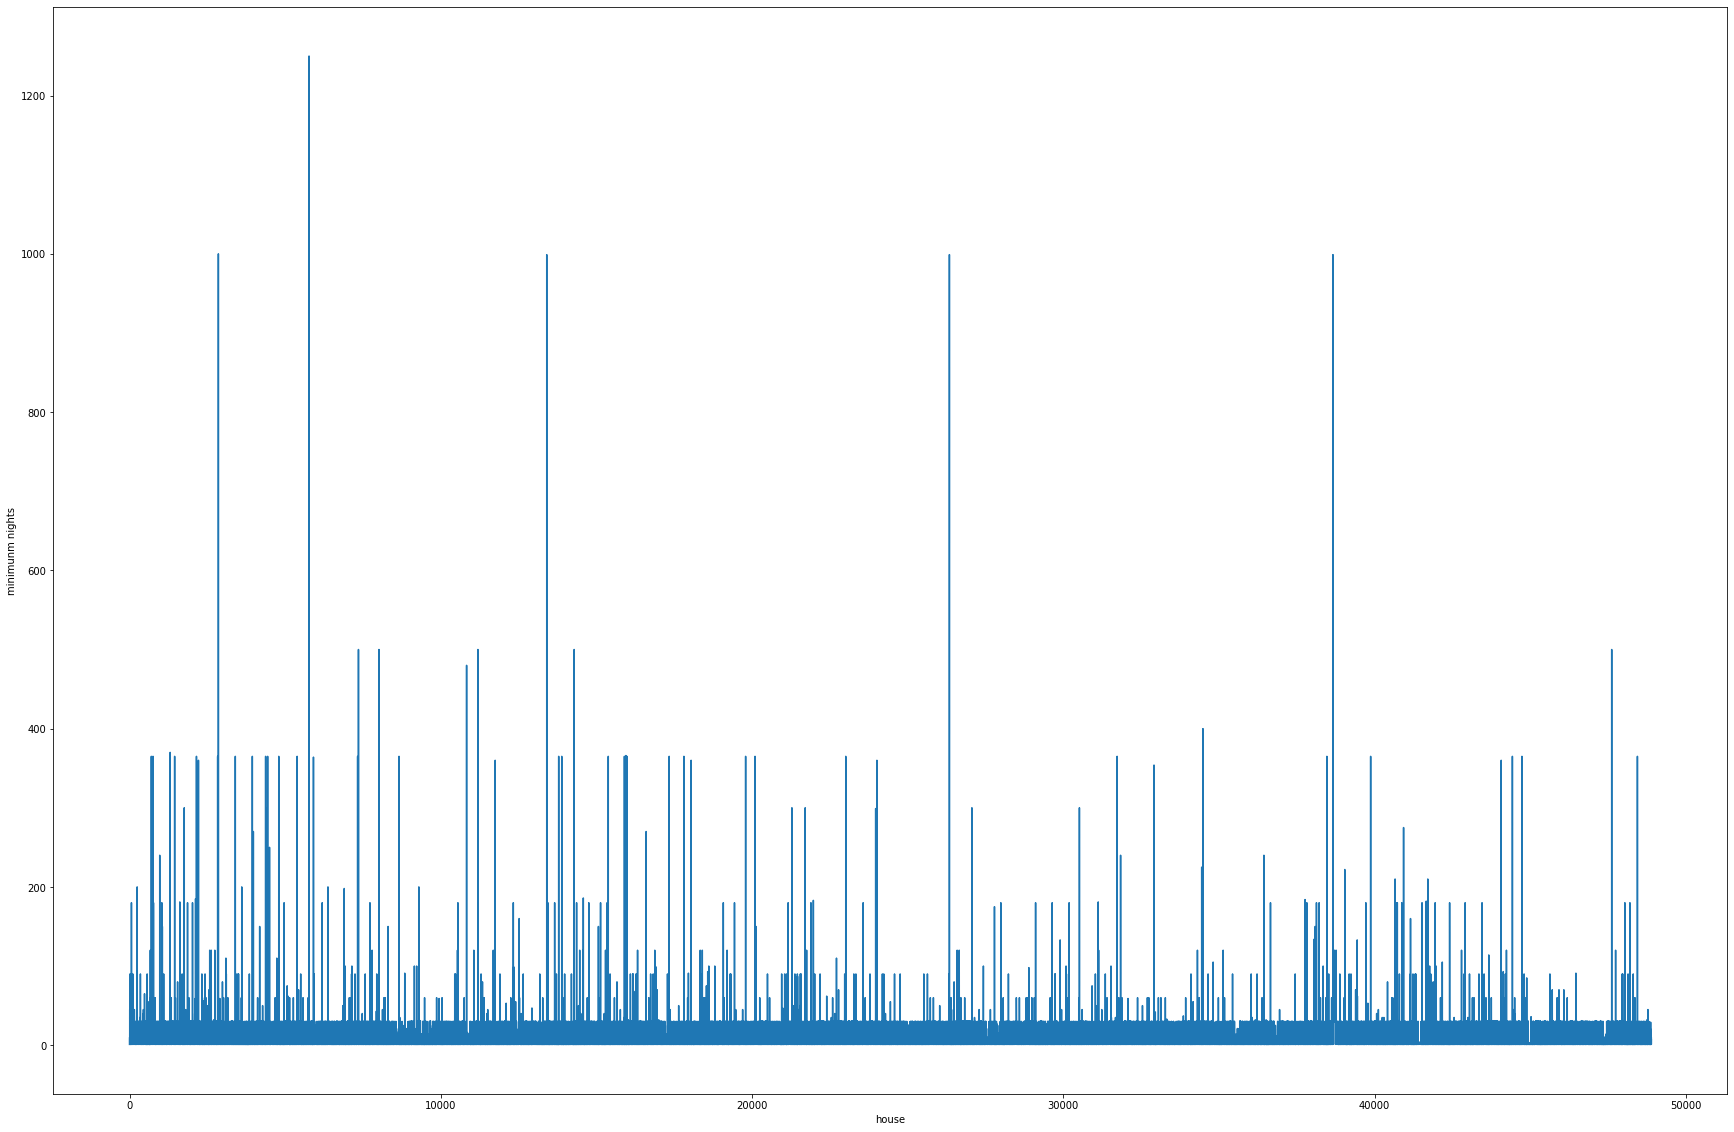

In [179]:
plt.plot(num_datas['minimum_nights'])
plt.xlabel('house')

plt.ylabel('minimunm nights')

** now we need to fill null and empty field in our dataframe **


In [180]:
#sometimes you dont have empty and null fields so make sure first in this way
available = ((num_datas != 0) & (num_datas.notnull()))
mask = available['price']
num_datas = num_datas[mask]

In [181]:
available.all(axis=1).value_counts()

False    33405
True     15490
dtype: int64

In [182]:
num_datas.head(10)

id  host_id  neighbourhood_group  neighbourhood  latitude  longitude  \
0   2539     2787                    0              5  40.64749  -73.97237   
1   2595     2845                    1              6  40.75362  -73.98377   
2   3647     4632                    1              7  40.80902  -73.94190   
3   3831     4869                    0              8  40.68514  -73.95976   
4   5022     7192                    1              9  40.79851  -73.94399   
5   5099     7322                    1             10  40.74767  -73.97500   
6   5121     7356                    0             11  40.68688  -73.95596   
7   5178     8967                    1             12  40.76489  -73.98493   
8   5203     7490                    1             13  40.80178  -73.96723   
9   5238     7549                    1             14  40.71344  -73.99037   
10  5295     7702                    1             13  40.80316  -73.96545   
11  5441     7989                    1             12  40.76076  -73.98867   
12  5803     9744                    0             15  40.66829  -73.98779   
13  6021    11528                    1             13  40.79826  -73.96113   
14  6090    11975                    1             16  40.73530  -74.00525   
15  6848    15991                    0             17  40.70837  -73.95352   
16  7097    17571                    0             18  40.69169  -73.97185   
17  7322    18946                    1             19  40.74192  -73.99501   
18  7726    20950                    0             20  40.67592  -73.94694   
19  7750    17985                    1              9  40.79685  -73.94872   
20  7801    21207                    0             17  40.71842  -73.95718   
21  8024    22486                    0             21  40.68069  -73.97706   
22  8025    22486                    0             21  40.67989  -73.97798   
23  8110    22486                    0             21  40.68001  -73.97865   
24  8490    25183                    0             11  40.68371  -73.94028   

    price  minimum_nights  number_of_reviews  reviews_per_month  \
0     149               1                  9               0.21   
1     225               1                 45               0.38   
2     150               3                  0                NaN   
3      89               1                270               4.64   
4      80              10                  9               0.10   
5     200               3                 74               0.59   
6      60              45                 49               0.40   
7      79               2                430               3.47   
8      79               2                118               0.99   
9     150               1                160               1.33   
10    135               5                 53               0.43   
11     85               2                188               1.50   
12     89               4                167               1.34   
13     85               2                113               0.91   
14    120              90                 27               0.22   
15    140               2                148               1.20   
16    215               2                198               1.72   
17    140               1                260               2.12   
18     99               3                 53               4.44   
19    190               7                  0                NaN   
20    299               3                  9               0.07   
21    130               2                130               1.09   
22     80               1                 39               0.37   
23    110               2                 71               0.61   
24    120               2                 88               0.73   

    calculated_host_listings_count  availability_365  
0                                6               365  
1                                2               355  
2                                1               365  
3             

In [183]:
num_datas.to_csv('./data/preproces1.csv',index=False)

In [184]:
#sckit learn has already funtions to help to clean data
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = np.nan, strategy = 'mean',axis=1)

In [186]:
values = imputer.fit_transform(num_datas)#exange empty and null values for the mean
X = pd.DataFrame(values)#rebuild the dataframe
X.columns = num_datas.columns#place columns
X.index = num_datas.index
X.head(40)

id  host_id  neighbourhood_group  neighbourhood  latitude  longitude  \
0    2539.0   2787.0                  0.0            5.0  40.64749  -73.97237   
1    2595.0   2845.0                  1.0            6.0  40.75362  -73.98377   
2    3647.0   4632.0                  1.0            7.0  40.80902  -73.94190   
3    3831.0   4869.0                  0.0            8.0  40.68514  -73.95976   
4    5022.0   7192.0                  1.0            9.0  40.79851  -73.94399   
5    5099.0   7322.0                  1.0           10.0  40.74767  -73.97500   
6    5121.0   7356.0                  0.0           11.0  40.68688  -73.95596   
7    5178.0   8967.0                  1.0           12.0  40.76489  -73.98493   
8    5203.0   7490.0                  1.0           13.0  40.80178  -73.96723   
9    5238.0   7549.0                  1.0           14.0  40.71344  -73.99037   
10   5295.0   7702.0                  1.0           13.0  40.80316  -73.96545   
11   5441.0   7989.0                  1.0           12.0  40.76076  -73.98867   
12   5803.0   9744.0                  0.0           15.0  40.66829  -73.98779   
13   6021.0  11528.0                  1.0           13.0  40.79826  -73.96113   
14   6090.0  11975.0                  1.0           16.0  40.73530  -74.00525   
15   6848.0  15991.0                  0.0           17.0  40.70837  -73.95352   
16   7097.0  17571.0                  0.0           18.0  40.69169  -73.97185   
17   7322.0  18946.0                  1.0           19.0  40.74192  -73.99501   
18   7726.0  20950.0                  0.0           20.0  40.67592  -73.94694   
19   7750.0  17985.0                  1.0            9.0  40.79685  -73.94872   
20   7801.0  21207.0                  0.0           17.0  40.71842  -73.95718   
21   8024.0  22486.0                  0.0           21.0  40.68069  -73.97706   
22   8025.0  22486.0                  0.0           21.0  40.67989  -73.97798   
23   8110.0  22486.0                  0.0           21.0  40.68001  -73.97865   
24   8490.0  25183.0                  0.0           11.0  40.68371  -73.94028   
25   8505.0  25326.0                  0.0           22.0  40.65599  -73.97519   
26   8700.0  26394.0                  1.0           23.0  40.86754  -73.92639   
27   9357.0  30193.0                  1.0           12.0  40.76715  -73.98533   
28   9518.0  31374.0                  1.0           23.0  40.86482  -73.92106   
29   9657.0  21904.0                  1.0           24.0  40.72920  -73.98542   
30   9668.0  32294.0                  1.0            7.0  40.82245  -73.95104   
31   9704.0  32045.0                  1.0            7.0  40.81305  -73.95466   
32   9782.0  32169.0                  0.0           25.0  40.72219  -73.93762   
33   9783.0  32294.0                  1.0            7.0  40.82130  -73.95318   
34  10452.0  35935.0                  0.0           11.0  40.68310  -73.95473   
35  10962.0   9744.0                  0.0           15.0  40.66869  -73.98780   
36  11452.0   7355.0                  0.0           11.0  40.68876  -73.94312   
37  11708.0  44145.0                  0.0           26.0  40.70186  -73.92745   
38  11943.0  45445.0                  0.0           27.0  40.63702  -73.96327   
39  12048.0   7549.0                  1.0           28.0  40.71401  -73.98917   

    price  minimum_nights  number_of_reviews  reviews_per_month  \
0   149.0             1.0                9.0           0.210000   
1   225.0             1.0               45.0           0.380000   
2   150.0             3.0                0.0         797.533375   
3    89.0             1.0              270.0           4.640000   
4    80.0            10.0                9.0           0.100000   
5   200.0             3.0               74.0           0.590000   
6    60.0            45.0               49.0           0.400000   
7    79.0             2.0              430.0           3.470000   
8    79.0             2.0              118.0           0.990000   
9   150.0        

In [187]:
X.to_csv('./data/preproces2.csv',index=False) #save yoour dataframe because is ready to train

In [188]:
if X.shape == num_datas.shape:print(True)# chek if you didn't lost data while cleaning

True


** visualize the data looking for inconsistencies **

Text(0, 0.5, 'minimunm nights')

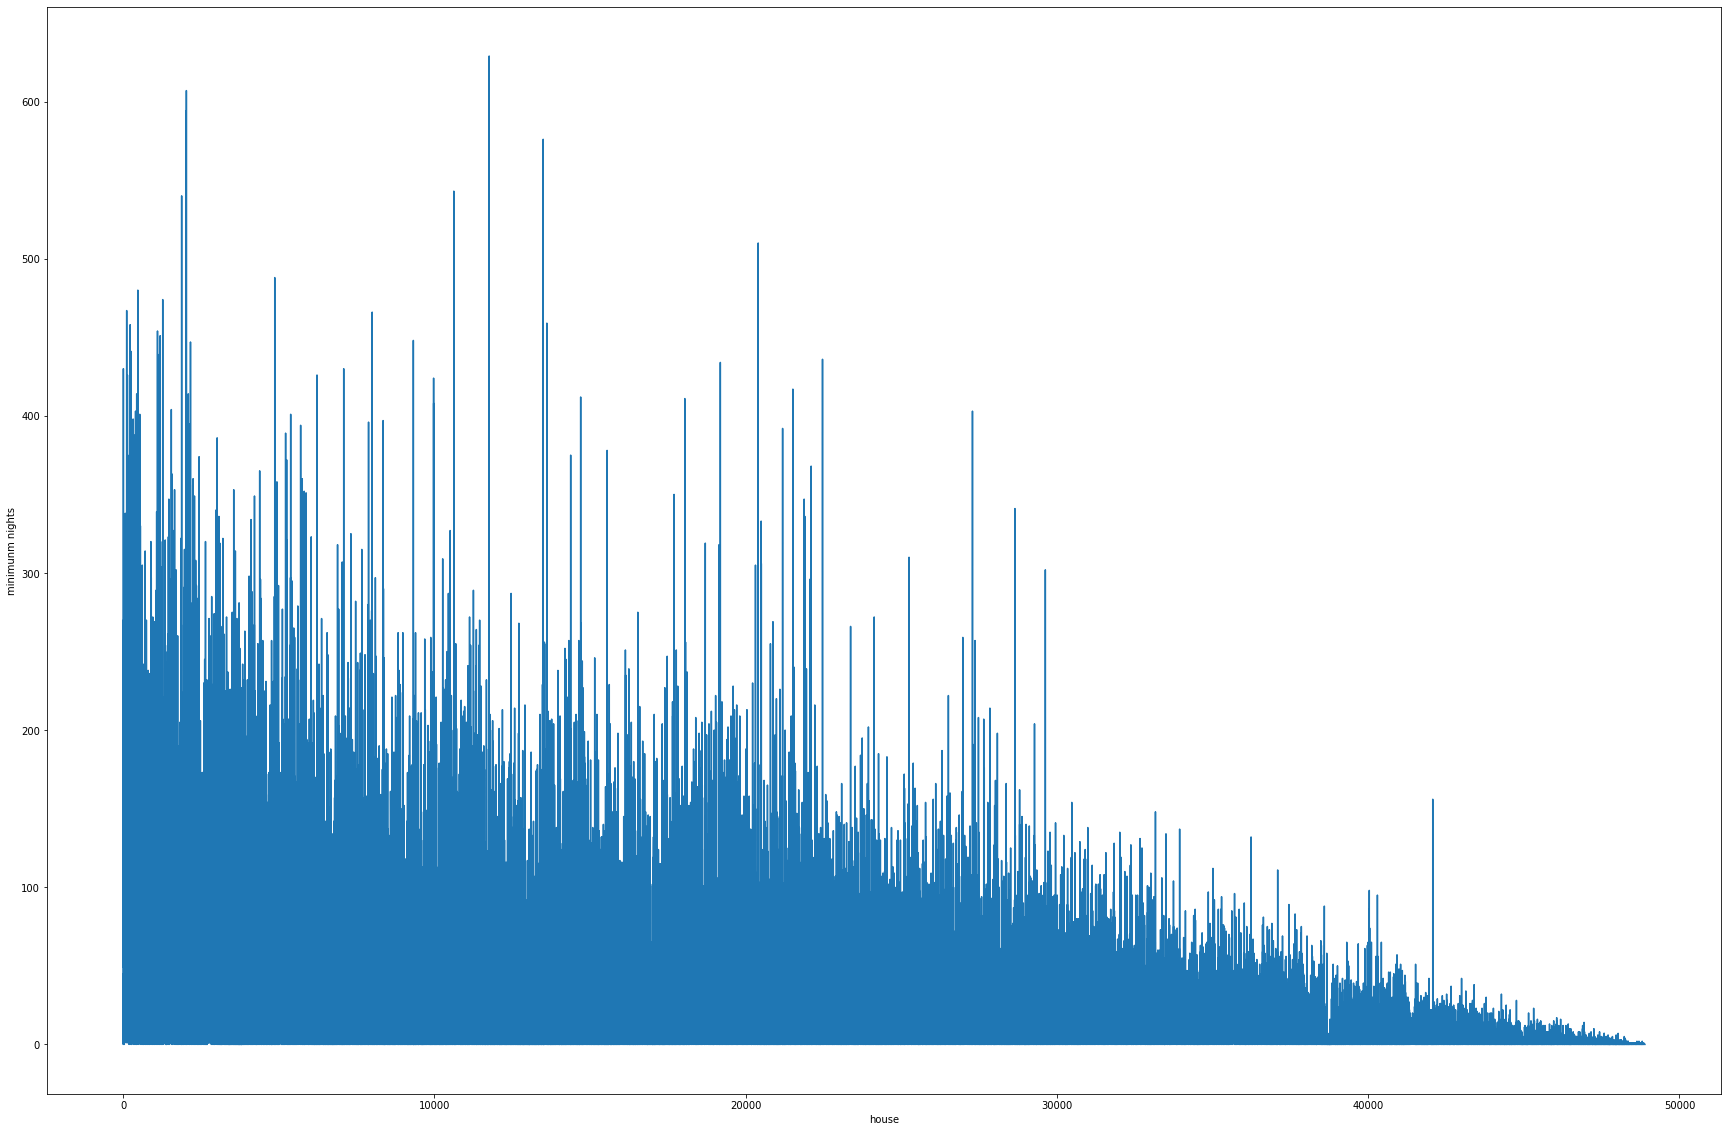

In [189]:
plt.plot(X['number_of_reviews'])
plt.xlabel('house')

plt.ylabel('minimunm nights')

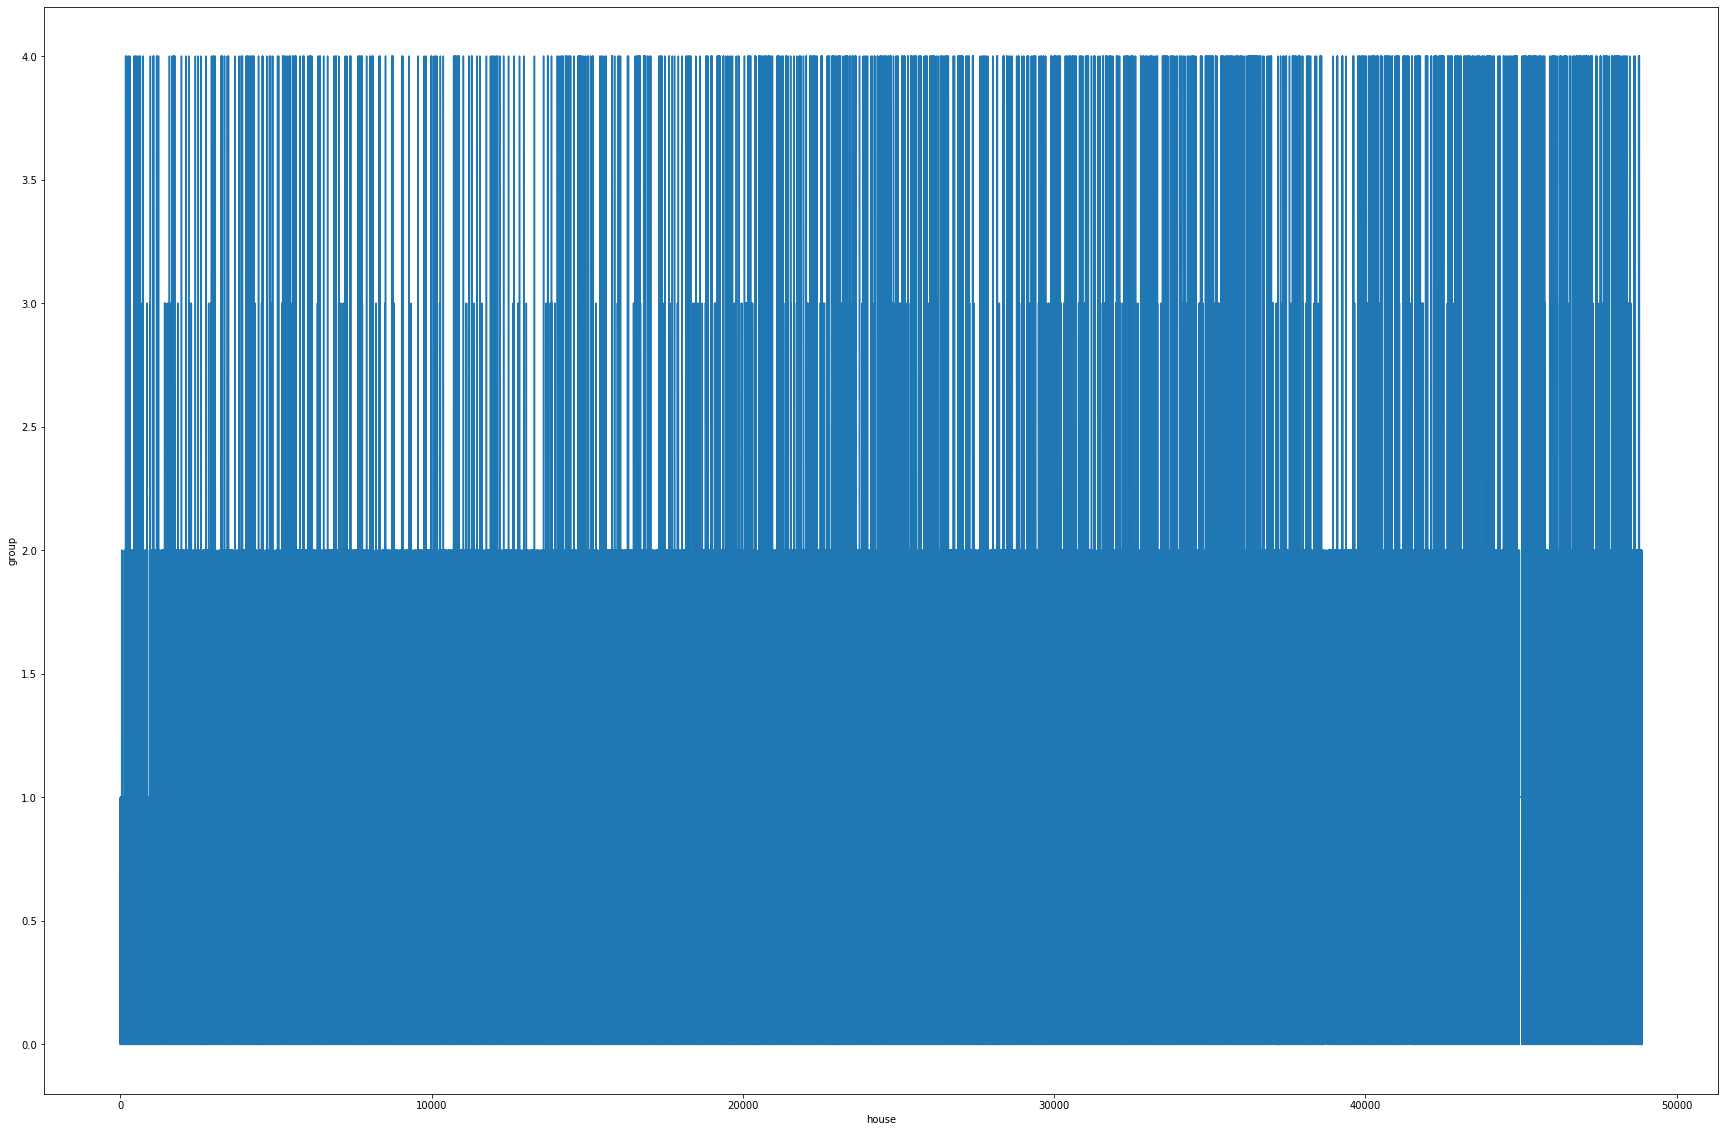

In [190]:
plt.plot(X['neighbourhood_group'])
plt.xlabel('house')

plt.ylabel('group')
plt.rcParams["figure.figsize"] = [30,20]

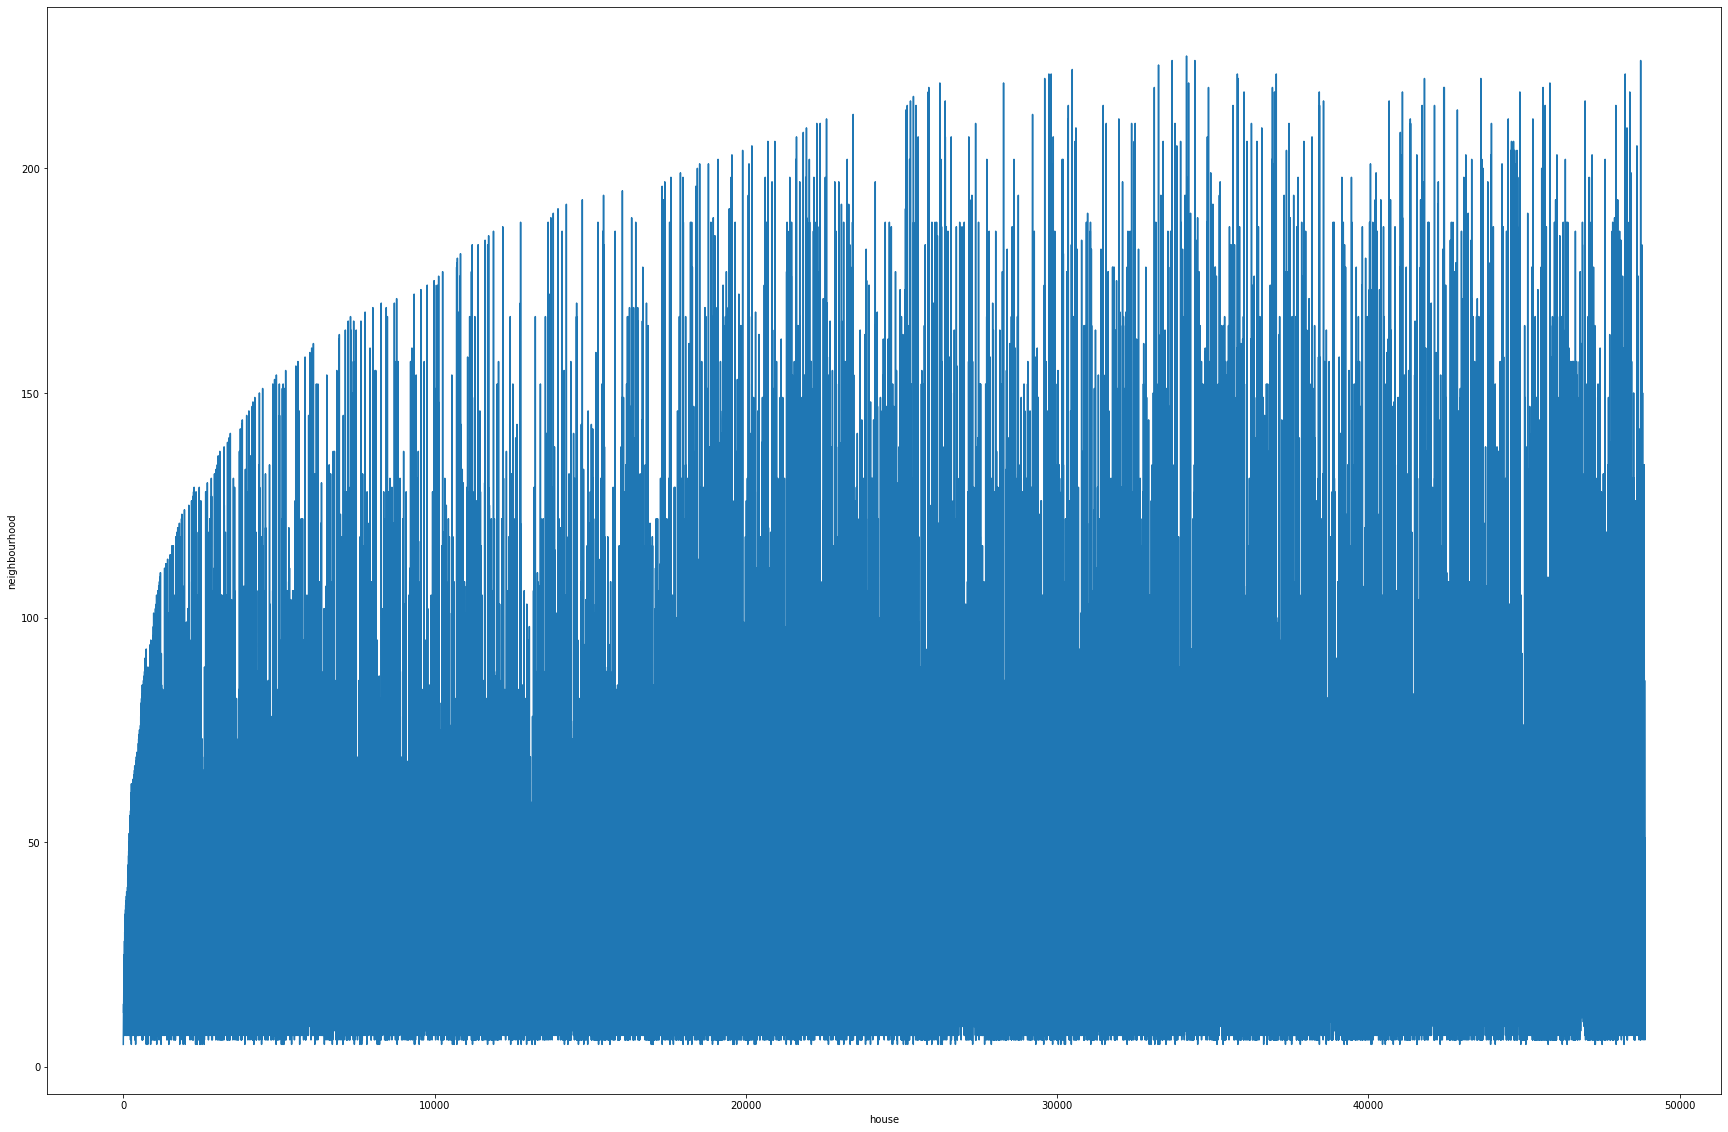

In [192]:
plt.plot(X['neighbourhood'])
plt.xlabel('house')

plt.ylabel('neighbourhood')
plt.rcParams["figure.figsize"] = [30,20]